In [ ]:
# mount google drive to colab
from google.colab import drive
import os
import networkx as nx
import pandas as pd
import json
import glob
import pandas as pd

n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone2/


print("###\n### {}".format(os.getcwd()))
print("#" * n)

Mounted at /content/drive
############################################################################################################################################
### colabs default working directory
###
### path: /content
############################################################################################################################################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone2
###
### /content/drive/Shareddrives/MADS_Milestone2
############################################################################################################################################


## Download the drug related data from OpenTargets

In [ ]:
# !wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ --recursive --no-parent --no-host-directories --cut-dirs 8 ftp://ftp.ebi.ac.uk/pub/databases/opentargets/platform/21.09/output/etl/json/molecule
# !wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ --recursive --no-parent --no-host-directories --cut-dirs 8 ftp://ftp.ebi.ac.uk/pub/databases/opentargets/platform/21.09/output/etl/json/indication
# !wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ --recursive --no-parent --no-host-directories --cut-dirs 8 ftp://ftp.ebi.ac.uk/pub/databases/opentargets/platform/21.09/output/etl/json/mechanismOfAction
# !wget --directory-prefix=/content/drive/Shareddrives/MADS_Milestone2/dat/ --recursive --no-parent --no-host-directories --cut-dirs 8 ftp://ftp.ebi.ac.uk/pub/databases/opentargets/platform/21.09/output/etl/json/fda/significantAdverseDrugReactions

In [ ]:
cd dat/

/content/drive/Shareddrives/MADS_Milestone2/dat


In [ ]:
ls

9606.protein.info.v11.5.txt.gz
9606.protein.links.full.v11.5.txt.gz
9606.protein.physical.links.full.v11.5.txt.gz
AllAPIJSON.zip
BIOGRID-ALL-4.4.202.tab3.zip
CHEMDBL_exploration/
curated_gene_disease_associations.tsv.gz
curated_variant_disease_associations.tsv.gz
dfs/
disease_mappings.tsv.gz
disease_to_disease_CURATED.tsv.gz
drug_indication_dict.json
drug_names_dict.json
fda/
go-basic.obo
go-basic.obo.1
indication/
mechanismOfAction/
molecule/
networkdf_dp_test.data


In [ ]:

# get data file names
# paths =['mechanismOfAction', 'indication', 'molecule', 'fda/significantAdverseDrugReactions']



# big_frames = []
# for path in paths:
#   filenames = glob.glob(path + "/*.json")
#   dfs = []
#   for filename in filenames:
#       dfs.append(pd.read_json(filename,lines=True))
#   print(path)
#   big_frames.append(pd.concat(dfs, ignore_index=True))



In [ ]:
# mechanismOfAction = big_frames[0]
# indication = big_frames[1]
# molecule = big_frames[2]
# fda = big_frames[3]

# # !mkdir dfs

# mechanismOfAction.to_pickle('dfs/mechanismOfAction')
# indication.to_pickle('dfs/indication')
# molecule.to_pickle('dfs/molecule')
# fda.to_pickle('dfs/fda')



In [ ]:
# using pickle ensures correct dtypes 
mechanismOfAction = pd.read_pickle('dfs/mechanismOfAction')
indication = pd.read_pickle('dfs/indication')
molecule = pd.read_pickle('dfs/molecule')
fda = pd.read_pickle('dfs/fda')


### indications dataset very useful. Shows drugs and what specific indications they are approved for. Also shows failed indications. Should only focus on approved indications as these are the indications that made it all the way through clinical trials. This dataset will be great for selecting drugs to focus on and filtering out other datasets based on our focus

In [ ]:
indication.head()

,id,indications,approvedIndications,indicationCount
0,CHEMBL413,"[{'disease': 'EFO_0004599', 'efoName': 'acute ...","[EFO_0003966, EFO_0000540]",120
1,CHEMBL941,"[{'disease': 'MONDO_0044917', 'efoName': 't-ly...","[EFO_0000616, EFO_0000339, EFO_0000311]",117
2,CHEMBL1172928,"[{'disease': 'MONDO_0002009', 'efoName': 'majo...",[],1
3,CHEMBL1234886,"[{'disease': 'EFO_0003103', 'efoName': 'urinar...",[],69
4,CHEMBL3039596,"[{'disease': 'EFO_0000537', 'efoName': 'hypert...",[EFO_0000537],1


In [ ]:
#big_frames[1]['indications'][0] json dump of failed indications

### drugs with any # of approved indications
### drugs with only one approved indication. We may want to to filter to drugs with just one approval. something to think about

In [ ]:
#indication['#approved_indications'] = indication['approvedIndications'].apply(lambda x: len(eval(x)))

approved_drugs_any = indication[ indication['approvedIndications'].map(len) >=1 ]
approved_drugs_one = indication[ indication['approvedIndications'].map(len) ==1 ]

### FDA dataset doesn't seem very useful to us. Shows adverse events

In [ ]:
fda.head()

,chembl_id,event,count,llr,critval,meddraCode
0,CHEMBL1120,abdominal discomfort,5,5.496439,5.127118,10000059.0
1,CHEMBL1120,abdominal pain,12,15.090692,5.127118,10000081.0
2,CHEMBL1120,activated partial thromboplastin time prolonged,2,5.514342,5.127118,10000636.0
3,CHEMBL1120,bezoar,4,21.266541,5.127118,10004542.0
4,CHEMBL1120,blood bicarbonate decreased,2,7.297308,5.127118,10005359.0


### mechanismofaction dataset will be very useful. shows drugs and their targets, actiontype for the drug, and mechanism of action. An early idea is to use the indication dataset to filter down the mechanismofaction dataset to only drugs we are interested in.

In [ ]:
mechanismOfAction

,actionType,mechanismOfAction,chemblIds,targetName,targetType,targets,references,one_indication
0,INHIBITOR,Cyclin-dependent kinase 5 inhibitor,[CHEMBL14762],Cyclin-dependent kinase 5,single protein,[ENSG00000164885],"[{'source': 'PubMed', 'ids': ['25747275', '262...",0
1,AGONIST,Insulin-like growth factor I receptor agonist,[CHEMBL1201716],Insulin-like growth factor I receptor,single protein,[ENSG00000140443],"[{'source': 'DailyMed', 'ids': ['setid=a8b27a1...",0
2,INHIBITOR,Serotonin transporter inhibitor,"[CHEMBL3989861, CHEMBL1118]",Serotonin transporter,single protein,[ENSG00000108576],"[{'source': 'FDA', 'ids': ['label/2013/205208s...",1
3,INHIBITOR,Dihydrofolate reductase inhibitor,"[CHEMBL2096646, CHEMBL1169]",Dihydrofolate reductase,single protein,[],"[{'source': 'PubMed', 'ids': ['12208114', '237...",1
4,AGONIST,Tumor necrosis factor receptor superfamily mem...,[CHEMBL1743080],Tumor necrosis factor receptor superfamily mem...,single protein,[ENSG00000120889],"[{'source': 'PubMed', 'ids': ['18304965', '201...",0
...,...,...,...,...,...,...,...,...
6111,NaN,Unknown,[CHEMBL2109382],NaN,NaN,NaN,[],0
6112,INHIBITOR,Topoisomerase IV inhibitor,[CHEMBL363449],Topoisomerase IV,protein complex,[],"[{'source': 'Other', 'ids': ['https://www.otsu...",0
6113,INHIBITOR,Bacterial penicillin-binding protein inhibitor,[CHEMBL1146],Bacterial penicillin-binding protein,protein family,[],"[{'source': 'PubMed', 'ids': ['20679509', '209...",0
6114,NaN,Unknown,[CHEMBL1239],NaN,NaN,NaN,"[{'source': 'Expert', 'ids': ['2009/07/new-dru...",1


In [ ]:
mechanismOfAction['targetType'].unique()

array(['single protein', 'protein family', 'protein complex', nan,
       'protein complex group', 'nucleic-acid',
       'protein nucleic-acid complex', 'selectivity group',
       'chimeric protein', 'protein-protein interaction'], dtype=object)

### example pulled from mechanismOfAction targets matches up with linkedtargets in molecule dataset, so don't think we need to use both. otherwise, molecule dataset has withdrawn, blackbox, and description features, but i don't think it is too useful to us otherwise (because mechanismOfAction has simiilar info already)

In [ ]:
#example pulled from mechanismOfAction targets matches up with linkedtargets, so don't think we need to use both
molecule[molecule['id'] =='CHEMBL4297311']

,id,canonicalSmiles,inchiKey,drugType,blackBoxWarning,name,maximumClinicalTrialPhase,hasBeenWithdrawn,isApproved,tradeNames,synonyms,crossReferences,linkedTargets,linkedDiseases,description,childChemblIds,yearOfFirstApproval,parentId,withdrawnNotice
10924,CHEMBL4297311,COc1cc(Cl)ccc1[C@H]1c2[nH]c3cccc(F)c3c2C2(CC2)...,ZBQMTQGDBFZUBG-NRFANRHFSA-N,Small molecule,0.0,ONO-2952,2.0,0.0,0.0,[],[Ono-2952],{'drugbank': ['DB14802']},"{'rows': ['ENSG00000100300'], 'count': 1}","{'rows': ['EFO_0000555'], 'count': 1}",Small molecule drug with a maximum clinical tr...,NaN,NaN,NaN,NaN


In [ ]:
molecule[molecule['blackBoxWarning'] == 1]

,id,canonicalSmiles,inchiKey,drugType,blackBoxWarning,name,maximumClinicalTrialPhase,hasBeenWithdrawn,isApproved,tradeNames,synonyms,crossReferences,linkedTargets,linkedDiseases,description,childChemblIds,yearOfFirstApproval,parentId,withdrawnNotice
6,CHEMBL1200632,CCCCCCCCCCCCCCCC(=O)O[C@@H]1[C@@H](O)[C@@H](O)...,GTNDZRUWKHDICY-DJHAJVGHSA-N,Small molecule,1.0,CLINDAMYCIN PALMITATE HYDROCHLORIDE,4.0,0.0,1.0,"[Cleocin, Clindamycin palmitate hydrochloride]","[Clindamycin palmitate hydrochloride, U-25,179...",{'DailyMed': ['clindamycin%20palmitate%20hydro...,NaN,NaN,Small molecule drug with a maximum clinical tr...,NaN,1986.0,CHEMBL1201289,NaN
9,CHEMBL1200879,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O.[Na+],KYITYFHKDODNCQ-UHFFFAOYSA-M,Small molecule,1.0,WARFARIN SODIUM,4.0,0.0,1.0,"[Athrombin, Coumadin, Jantoven, Marevan, Panwa...","[Warfarin sodium, Warfarin sodium salt]","{'DailyMed': ['warfarin%20sodium'], 'PubChem':...","{'rows': ['ENSG00000167397'], 'count': 1}","{'rows': ['EFO_0000275', 'EFO_0009557', 'EFO_0...",Small molecule drug with a maximum clinical tr...,NaN,1954.0,CHEMBL1464,NaN
45,CHEMBL2023898,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc(-c3...,FKRSSPOQAMALKA-CUPIEXAXSA-N,Small molecule,1.0,DACLATASVIR,4.0,0.0,1.0,[Daklinza],"[BMS 790052, BMS-790052, Daclatasvir, EBP 883,...","{'Wikipedia': ['Daclatasvir'], 'drugbank': ['D...",NaN,NaN,Small molecule drug with a maximum clinical tr...,[CHEMBL2303621],2015.0,NaN,NaN
53,CHEMBL2107840,NaN,NaN,Small molecule,1.0,PATIROMER CALCIUM,4.0,0.0,1.0,[Veltassa],"[Patiromer calcium, Patiromer sorbitex calcium...",{'DailyMed': ['patiromer%20sorbitex%20calcium'...,NaN,NaN,Small molecule drug with a maximum clinical tr...,NaN,2015.0,NaN,NaN
95,CHEMBL3989522,O.O=C([O-])CN(CCN(CC(=O)[O-])CC(=O)[O-])CC(=O)...,JHECKPXUCKQCSH-UHFFFAOYSA-J,Small molecule,1.0,EDETATE CALCIUM DISODIUM,4.0,0.0,1.0,"[Calcium Disodium Edetate, Calcium Disodium Ed...","[Calcium disodium edetate, Calcium tetracemine...",NaN,NaN,NaN,Small molecule drug with a maximum clinical tr...,NaN,1953.0,CHEMBL1200375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12513,CHEMBL2108611,NaN,NaN,Antibody,1.0,INOTUZUMAB OZOGAMICIN,4.0,0.0,1.0,[Besponsa],"[CMC-544, Inotuzumab ozogamicin, PF-05208773, ...",{'DailyMed': ['inotuzumab%20ozogamicin']},"{'rows': ['ENSG00000012124'], 'count': 1}","{'rows': ['EFO_0000616', 'MONDO_0000873', 'EFO...",Antibody drug with a maximum clinical trial ph...,NaN,2017.0,NaN,NaN
12527,CHEMBL285674,Clc1ccc2c(c1)C(c1ccccc1)=NCc1nncn1-2,CDCHDCWJMGXXRH-UHFFFAOYSA-N,Small molecule,1.0,ESTAZOLAM,4.0,0.0,1.0,"[Estazolam, Eurodin, Prosom]","[ABBOTT-47631, Estazolam, Estazolam civ, NSC-2...","{'DailyMed': ['estazolam'], 'PubChem': ['14420...","{'rows': ['ENSG00000182256', 'ENSG00000022355'...","{'rows': ['EFO_0004698'], 'count': 1}",Small molecule drug with a maximum clinical tr...,NaN,1990.0,NaN,NaN
12588,CHEMBL596,CCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1,PJMPHNIQZUBGLI-UHFFFAOYSA-N,Small molecule,1.0,FENTANYL,4.0,0.0,1.0,"[Abstral, Actiq, Breakyl, Duragesic, Duragesic...","[AD 923, AD-923, EN-3267, En3267, Fentanyl, Fe...","{'DailyMed': ['fentanyl', 'fentanyl%20citrate'...","{'rows': ['ENSG00000112038'], 'count': 1}","{'rows': ['EFO_0003777', 'EFO_1001139', 'HP_00...",Small molecule drug with a maximum clinical tr...,"[CHEMBL688, CHEMBL1201159]",1968.0,NaN,NaN
12592,CHEMBL9,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21,OGJPXUAPXNRGGI-UHFFFAOYSA-N,Small molecule,1.0,NORFLOXACIN,4.0,0.0,1.0,"[Baccidal, Chibroxin, Noroxin, Quinabic, Utinor]","[MK-366, Norfloxacin, Noroxin]","{'PubChem': ['11112831', '124882669', '1442042...",NaN,NaN,Small molecule drug with a maximum clinical tr...,[CHEMBL4635810],1986.0,NaN,NaN


In [ ]:
approved_drugs_one_list = approved_drugs_one['id'].to_list()

In [ ]:
def drug_check(x):
  if set(x).intersection(set(approved_drugs_one_list)): ## added eval when reading in from directory directly
    return 1
  else:
    return 0

In [ ]:
mechanismOfAction['one_indication'] =  mechanismOfAction['chemblIds'].apply(drug_check)

### drugs with exactly one approved indication. one thing to figure out why are some drugs are grouped together. is it because they share the same targets? or because they are coformulated in the same drug?

In [ ]:
mechanismOfAction[mechanismOfAction['one_indication'] ==1]

,actionType,mechanismOfAction,chemblIds,targetName,targetType,targets,references,one_indication
2,INHIBITOR,Serotonin transporter inhibitor,"[CHEMBL3989861, CHEMBL1118]",Serotonin transporter,single protein,[ENSG00000108576],"[{'source': 'FDA', 'ids': ['label/2013/205208s...",1
3,INHIBITOR,Dihydrofolate reductase inhibitor,"[CHEMBL2096646, CHEMBL1169]",Dihydrofolate reductase,single protein,[],"[{'source': 'PubMed', 'ids': ['12208114', '237...",1
12,INHIBITOR,Phosphodiesterase 3A inhibitor,"[CHEMBL2096642, CHEMBL12856]",Phosphodiesterase 3A,single protein,[ENSG00000172572],"[{'source': 'Wikipedia', 'ids': ['Amrinone'], ...",1
13,ANTAGONIST,Beta-1 adrenergic receptor antagonist,"[CHEMBL1200947, CHEMBL1291]",Beta-1 adrenergic receptor,single protein,[ENSG00000043591],"[{'source': 'DailyMed', 'ids': ['archiveid=129...",1
17,ACTIVATOR,Plasminogen activator,[CHEMBL2107885],Plasminogen,single protein,[ENSG00000122194],"[{'source': 'DailyMed', 'ids': ['setid=e9ae665...",1
...,...,...,...,...,...,...,...,...
6099,INHIBITOR,Human herpesvirus 1 DNA polymerase inhibitor,[CHEMBL152],Human herpesvirus 1 DNA polymerase,single protein,[],"[{'source': 'PubMed', 'ids': ['17913252'], 'ur...",1
6100,INHIBITOR,Serotonin transporter inhibitor,"[CHEMBL4297064, CHEMBL259209]",Serotonin transporter,single protein,[ENSG00000108576],"[{'source': 'DailyMed', 'ids': ['setid=16a4a31...",1
6102,INHIBITOR,DNA topoisomerase II alpha inhibitor,"[CHEMBL359744, CHEMBL53463]",DNA topoisomerase II alpha,single protein,[ENSG00000131747],"[{'source': 'FDA', 'ids': ['label/2015/050718s...",1
6107,INHIBITOR,Bacterial penicillin-binding protein inhibitor,"[CHEMBL1201118, CHEMBL1201195]",Bacterial penicillin-binding protein,protein family,[],"[{'source': 'PubMed', 'ids': ['3898066'], 'url...",1


In [ ]:
exploded_one = mechanismOfAction.explode(column='chemblIds', ignore_index=True)
exploded_two = exploded_one.explode(column='targets')

In [ ]:
exploded_two.dropna(axis=0, subset=['chemblIds', 'targets'], inplace=True)

In [ ]:
action_types = set(exploded_two['actionType'].to_list())
print('The following unique action types are available: \n')
for type_ in action_types:
  print(type_)


The following unique action types are available: 

AGONIST
ANTAGONIST
PROTEOLYTIC ENZYME
SUBSTRATE
RELEASING AGENT
POSITIVE ALLOSTERIC MODULATOR
HYDROLYTIC ENZYME
MODULATOR
BLOCKER
BINDING AGENT
DISRUPTING AGENT
INVERSE AGONIST
POSITIVE MODULATOR
STABILISER
NEGATIVE ALLOSTERIC MODULATOR
CROSS-LINKING AGENT
OTHER
ANTISENSE INHIBITOR
OPENER
ALLOSTERIC ANTAGONIST
DEGRADER
ACTIVATOR
PARTIAL AGONIST
INHIBITOR
NEGATIVE MODULATOR


### Filter for action type and drugs that only have 1 approved indication

In [ ]:
molecule['chemblIds'] = molecule['id']
exploded_two = exploded_two.merge(molecule, on='chemblIds')
exploded_two = exploded_two[exploded_two['actionType'].isin(['ANTAGONIST', 'INHIBITOR','ANTISENSE' ,'INHIBITOR', 'ALLOSTERIC ANTAGONIST', 'DEGRADER', 'BLOCKER'])]
exploded_two = exploded_two[exploded_two['one_indication'] ==1]

In [ ]:
a,b = exploded_two['chemblIds'].to_list(), exploded_two['targets'].to_list()
edge_list = [tuple((node1, node2)) for node1,node2 in zip(a,b)]


In [ ]:
node_list = set(a).union(set(b))
print(f'there are nodes {len(node_list)} and {len(edge_list)} edges')

there are nodes 998 and 1941 edges


In [ ]:
# G1 = nx.Graph()
# G1.add_nodes_from(node_list)
# G1.add_edges_from(edge_list)

In [ ]:
#stop don't run next cell intentional break
# raise Notimplementederror()

In [ ]:
# nx.draw(G1, node_size=0.1)

In [ ]:
#stop don't run next cell intentional break
# raise Notimplementederror()

In [ ]:
exploded_one.actionType.value_counts()

INHIBITOR                        3566
ANTAGONIST                       1208
AGONIST                          1038
BLOCKER                           237
BINDING AGENT                     213
MODULATOR                         105
POSITIVE ALLOSTERIC MODULATOR      93
PARTIAL AGONIST                    65
ACTIVATOR                          64
HYDROLYTIC ENZYME                  61
RELEASING AGENT                    47
SEQUESTERING AGENT                 41
CROSS-LINKING AGENT                41
POSITIVE MODULATOR                 40
OPENER                             39
OTHER                              38
ANTISENSE INHIBITOR                33
DISRUPTING AGENT                   28
CHELATING AGENT                    25
NEGATIVE ALLOSTERIC MODULATOR      25
STABILISER                         23
INVERSE AGONIST                    18
RNAI INHIBITOR                     18
SUBSTRATE                          15
PROTEOLYTIC ENZYME                  7
NEGATIVE MODULATOR                  6
REDUCING AGE

### Don't re run cell below takes ~15 mins

### How do we want to construct the above network ? As is this is just drug-target interactions. Drug-Drug share no edges, and same with target-target. Do we want to show interactions where drugs are coformulated? Do we want to show interactions where certain targets are targetted together? What about drug-protein interactions that are not directly targetted? What about grouping by action type?

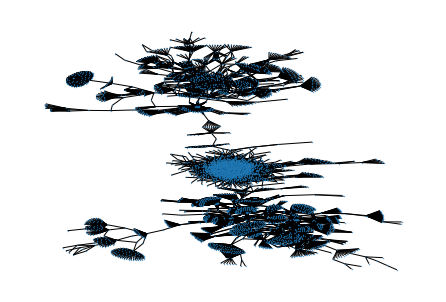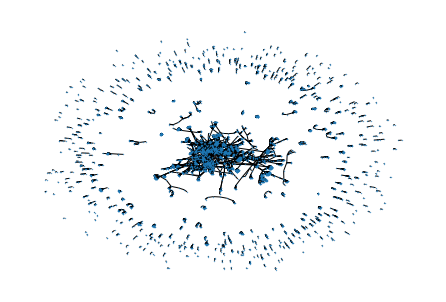

In [ ]:
try:
    import mygene
except ModuleNotFoundError as err:
    !pip install mygene
    import mygene
    # Error handling
    print(err)
 
mg = mygene.MyGeneInfo()
out = mg.querymany(exploded_two['targets'], scopes='ensembl.gene', fields='entrezgene,symbol', species='human', returnall=True)

No module named 'mygene'
querying 1-1000...done.
querying 1001-1941...done.
Finished.
247 input query terms found dup hits:
	[('ENSG00000108576', 23), ('ENSG00000172572', 9), ('ENSG00000043591', 24), ('ENSG00000181072', 12), 


In [ ]:
new_dict = {}
counter= 0
for i in out['out']:
  new_dict[counter] = i
  counter+=1
   

In [ ]:
target_list = set(exploded_two['targets'].to_list())

### Make Dictionaries for entrezgene and symbols

In [ ]:
entrezgene_dict = {}
for i in target_list:
  for x in range(0,len(new_dict)):
    if new_dict[x]['query'] == i:
      try:
        entrezgene_dict[i] = new_dict[x]['entrezgene']
      except:
        entrezgene_dict[i] = 'not found'

symbol_dict = {}
for i in target_list:
  for x in range(0,len(new_dict)):
    if new_dict[x]['query'] == i:
      symbol_dict[i] = new_dict[x]['symbol']


In [ ]:
exploded_two['entrezgene'] = exploded_two['targets'].replace(entrezgene_dict)
exploded_two['symbol'] = exploded_two['targets'].replace(symbol_dict)

In [ ]:
exploded_two


,actionType,mechanismOfAction,chemblIds,targetName,targetType,targets,references,one_indication,entrezgene,symbol
2,INHIBITOR,Serotonin transporter inhibitor,CHEMBL3989861,Serotonin transporter,single protein,ENSG00000108576,"[{'source': 'FDA', 'ids': ['label/2013/205208s...",1,6532,SLC6A4
3,INHIBITOR,Serotonin transporter inhibitor,CHEMBL1118,Serotonin transporter,single protein,ENSG00000108576,"[{'source': 'FDA', 'ids': ['label/2013/205208s...",1,6532,SLC6A4
16,INHIBITOR,Phosphodiesterase 3A inhibitor,CHEMBL2096642,Phosphodiesterase 3A,single protein,ENSG00000172572,"[{'source': 'Wikipedia', 'ids': ['Amrinone'], ...",1,5139,PDE3A
17,INHIBITOR,Phosphodiesterase 3A inhibitor,CHEMBL12856,Phosphodiesterase 3A,single protein,ENSG00000172572,"[{'source': 'Wikipedia', 'ids': ['Amrinone'], ...",1,5139,PDE3A
18,ANTAGONIST,Beta-1 adrenergic receptor antagonist,CHEMBL1200947,Beta-1 adrenergic receptor,single protein,ENSG00000043591,"[{'source': 'DailyMed', 'ids': ['archiveid=129...",1,153,ADRB1
...,...,...,...,...,...,...,...,...,...,...
7419,INHIBITOR,Fibrinogen inhibitor,CHEMBL1201505,Fibrinogen,protein family,ENSG00000171557,"[{'source': 'PubMed', 'ids': ['124138'], 'urls...",1,2266,FGG
7433,INHIBITOR,Serotonin transporter inhibitor,CHEMBL4297064,Serotonin transporter,single protein,ENSG00000108576,"[{'source': 'DailyMed', 'ids': ['setid=16a4a31...",1,6532,SLC6A4
7434,INHIBITOR,Serotonin transporter inhibitor,CHEMBL259209,Serotonin transporter,single protein,ENSG00000108576,"[{'source': 'DailyMed', 'ids': ['setid=16a4a31...",1,6532,SLC6A4
7436,INHIBITOR,DNA topoisomerase II alpha inhibitor,CHEMBL359744,DNA topoisomerase II alpha,single protein,ENSG00000131747,"[{'source': 'FDA', 'ids': ['label/2015/050718s...",1,7153,TOP2A


In [ ]:
network_df = pd.DataFrame(edge_list, columns=['node1', 'node2_ensembl.gene'])

In [ ]:
network_df['node2'] = network_df['node2_ensembl.gene'].replace(entrezgene_dict)
network_df['node2_name'] = network_df['node2_ensembl.gene'].replace(symbol_dict)
network_df['color'] = 'yellow'
network_df['shape'] = '?'
network_df['node1_type'] = 'drug'
network_df['node2_type'] = 'target'

In [ ]:
network_df

,node1,node2_ensembl.gene,node2,node2_name,color,shape,node1_type,node2_type
0,CHEMBL3989861,ENSG00000108576,6532,SLC6A4,yellow,?,drug,target
1,CHEMBL1118,ENSG00000108576,6532,SLC6A4,yellow,?,drug,target
2,CHEMBL2096642,ENSG00000172572,5139,PDE3A,yellow,?,drug,target
3,CHEMBL12856,ENSG00000172572,5139,PDE3A,yellow,?,drug,target
4,CHEMBL1200947,ENSG00000043591,153,ADRB1,yellow,?,drug,target
...,...,...,...,...,...,...,...,...
1936,CHEMBL1201505,ENSG00000171557,2266,FGG,yellow,?,drug,target
1937,CHEMBL4297064,ENSG00000108576,6532,SLC6A4,yellow,?,drug,target
1938,CHEMBL259209,ENSG00000108576,6532,SLC6A4,yellow,?,drug,target
1939,CHEMBL359744,ENSG00000131747,7153,TOP2A,yellow,?,drug,target


In [ ]:
 set(exploded_two['targetType'])

{'chimeric protein',
 'protein complex',
 'protein complex group',
 'protein family',
 'selectivity group',
 'single protein'}

In [ ]:
exploded_two[exploded_two['targetType'] == 'selectivity group']

,actionType,mechanismOfAction,chemblIds,targetName,targetType,targets,references,one_indication,entrezgene,symbol
3578,ANTAGONIST,Dopamine D1 and D2 receptor antagonist,CHEMBL418995,Dopamine D1 and D2 receptor,selectivity group,ENSG00000149295,"[{'source': 'PubMed', 'ids': ['21220791', '362...",1,1813,DRD2
3578,ANTAGONIST,Dopamine D1 and D2 receptor antagonist,CHEMBL418995,Dopamine D1 and D2 receptor,selectivity group,ENSG00000184845,"[{'source': 'PubMed', 'ids': ['21220791', '362...",1,1812,DRD1
4164,ANTAGONIST,Serotonin 2 receptors; 5-HT2a & 5-HT2c antagonist,CHEMBL12713,Serotonin 2 receptors; 5-HT2a & 5-HT2c,selectivity group,ENSG00000102468,"[{'source': 'PubMed', 'ids': ['16925508', '227...",1,3356,HTR2A
4164,ANTAGONIST,Serotonin 2 receptors; 5-HT2a & 5-HT2c antagonist,CHEMBL12713,Serotonin 2 receptors; 5-HT2a & 5-HT2c,selectivity group,ENSG00000147246,"[{'source': 'PubMed', 'ids': ['16925508', '227...",1,3358,HTR2C
4886,INHIBITOR,Cholinesterases; ACHE & BCHE inhibitor,CHEMBL1677,Cholinesterases; ACHE & BCHE,selectivity group,ENSG00000114200,"[{'source': 'PubMed', 'ids': ['10375753', '128...",1,590,BCHE
4886,INHIBITOR,Cholinesterases; ACHE & BCHE inhibitor,CHEMBL1677,Cholinesterases; ACHE & BCHE,selectivity group,ENSG00000087085,"[{'source': 'PubMed', 'ids': ['10375753', '128...",1,43,ACHE
4887,INHIBITOR,Cholinesterases; ACHE & BCHE inhibitor,CHEMBL95,Cholinesterases; ACHE & BCHE,selectivity group,ENSG00000114200,"[{'source': 'PubMed', 'ids': ['10375753', '128...",1,590,BCHE
4887,INHIBITOR,Cholinesterases; ACHE & BCHE inhibitor,CHEMBL95,Cholinesterases; ACHE & BCHE,selectivity group,ENSG00000087085,"[{'source': 'PubMed', 'ids': ['10375753', '128...",1,43,ACHE


In [ ]:
# with open('drug_names_dict.json') as jsonfile: # can just get from molecule df
#     drug_dict = json.load(jsonfile)

drug_dict = dict(zip(exploded_two['chemblIds'].to_list(),exploded_two['name'].to_list() ))

with open('drug_indication_dict.json') as jsonfile:
    indication_dict = json.load(jsonfile)

In [ ]:
network_df['node1_name'] = network_df['node1'].replace(drug_dict)
network_df['indication_class'] = network_df['node1'].replace(indication_dict) # takes a very long time to run 

In [ ]:
network_df.sample(5)

,node1,node2_ensembl.gene,node2,node2_name,color,shape,node1_type,node2_type,node1_name,indication_class
15,CHEMBL1083659,ENSG00000121764,3061,HCRTR1,yellow,?,drug,target,SUVOREXANT,None
785,CHEMBL1200586,ENSG00000183873,6331,SCN5A,yellow,?,drug,target,PRILOCAINE HYDROCHLORIDE,Anesthetic (local)
468,CHEMBL159,ENSG00000196230,203068,TUBB,yellow,?,drug,target,VINBLASTINE,Antineoplastic
1090,CHEMBL3545191,ENSG00000132855,27329,ANGPTL3,yellow,?,drug,target,EVINACUMAB,None
88,CHEMBL3545367,ENSG00000137252,3062,HCRTR2,yellow,?,drug,target,LEMBOREXANT,None


In [ ]:
# network_df['indication_class'].unique()

In [ ]:

netword_df = pd.read_pickle('dfs/networkdf_dp_test.data')
reduced = network_df[['node1','node2']]

In [ ]:
G = nx.from_pandas_edgelist(reduced, 'node1', 'node2')

In [ ]:
# !pip install csrgraph

In [ ]:
import csrgraph as cg
import numpy as np

In [ ]:
# #Gc = max(nx.connected_components(G), key=len)

# #G = cg.csrgraph(G.subgraph(Gc), threads=12) 
# node_names = G.names
# walks = G.random_walks(walklen=100, # length of the walks
#                 epochs=2, # how many times to start a walk from each node
#                 start_nodes=[0,1,2], # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
#                 return_weight=0.0, # return to previous node ?
#                 neighbor_weight=0.1)

AttributeError: ignored

In [ ]:
node_names[0:3]

In [ ]:
walks.shape

In [ ]:
walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names


In [ ]:
walks[0:3]

In [ ]:
walks[0:3]

If you only want the largest connected component, it’s more efficient to use max than sort.

>>> Gc = max(nx.connected_component_subgraphs(G), key=len)

In [ ]:
Gc = max(nx.connected_components(G), key=len)

In [ ]:
nx.draw(G.subgraph(Gc),)

In [ ]:
#network_df.to_pickle('dfs/networkdf_dp_test.data')

In [ ]:
ls

In [ ]:
G.random_walks?

In [ ]:
netword_df[netword_df['node2'] == '6331']

In [ ]:
netword_df[netword_df['node1_name'] == 'D-PROLINE']

,node1,node2_ensembl.gene,node2,node2_name,color,shape,node1_type,node2_type,node1_name,indication_class


In [ ]:
# netword_df['node1_name'].to_list()

In [ ]:
approved_drugs_any_list = approved_drugs_any['id'].to_list()
def drug_check(x, approved_list=approved_drugs_any):
  if set(x).intersection(set(approved_list)): ## added eval when reading in from directory directly
    return 1
  else:
    return 0


mechanismOfAction['any_indication'] =  mechanismOfAction['chemblIds'].apply(drug_check)

mechanismOfAction

In [ ]:
exploded_two.columns

Index(['actionType', 'mechanismOfAction', 'chemblIds', 'targetName',
       'targetType', 'targets', 'references', 'one_indication', 'entrezgene',
       'symbol'],
      dtype='object')

In [ ]:
exploded_two.merge(molecule, on='chemblIds')